In [1]:

%matplotlib inline
import numpy as np
from scipy import special
from matplotlib import pyplot as plt
from matplotlib import animation, rc
from IPython.display import HTML

import pickle as pkl
import networkx as nx

# Compare the consensus convergence of qhat, for neighboring degree=2

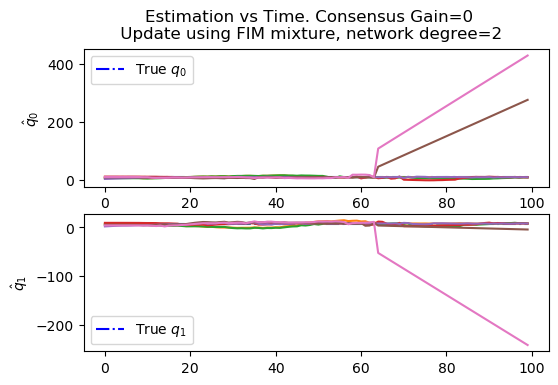

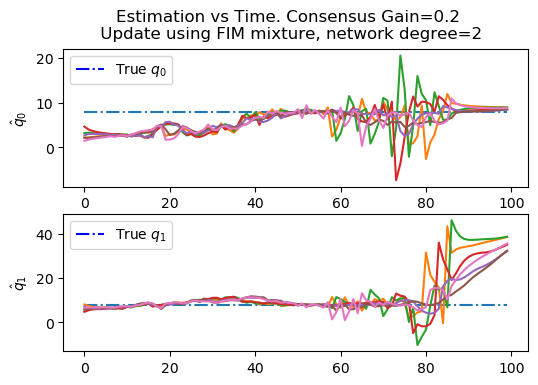

In [13]:
from matplotlib.lines import Line2D

for gain in  [0,0.2]:
    expr= "Consensus-gain{}-FIM-Mixture".format(gain)
    filepath = "{}.pkl".format(expr)
    with open(filepath,'rb') as file:
        record = pkl.load(file)

    title=r"Consensus Gain={}".format(gain)

    qs = record['src_locs']['source_1']

    fig, ax = plt.subplots(2,dpi=100)

    fig.suptitle('Estimation vs Time. Consensus Gain={}\n Update using FIM mixture, network degree=2'.format(gain))
    for _ in range(2):
        ax[_].plot(qs[:,_],'-.')
        custom_lines = [Line2D([0], [0], color='blue', ls='-.'),]
        ax[_].legend(custom_lines, ['True $q_{}$'.format(_)])
        for name,est in record['est_locs_log'].items():
            ax[_].plot(est[:,_])
            ax[_].set_ylabel(r'$\hat q_{}$'.format(_))



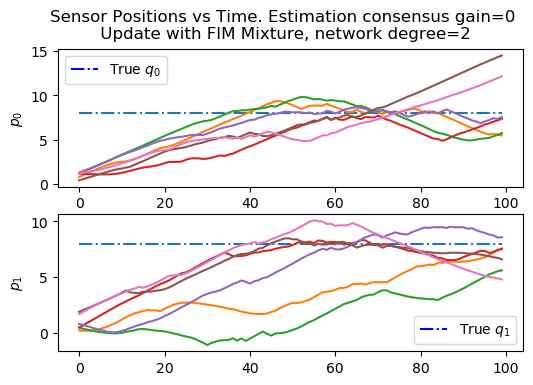

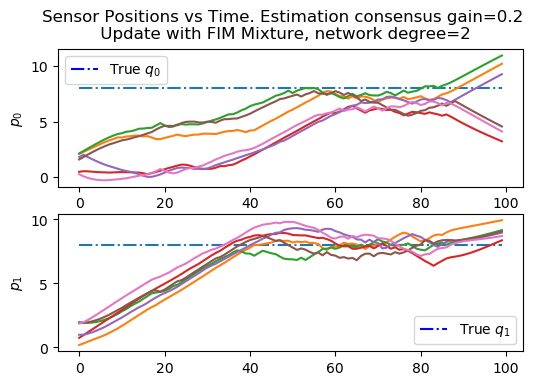

In [14]:
for gain in [0,0.2]:
    expr= "Consensus-gain{}-FIM-Mixture".format(gain)
    filepath = "{}.pkl".format(expr)
    with open(filepath,'rb') as file:
        record = pkl.load(file)

    qs = record['src_locs']['source_1']
    ps = np.array([locs for sensor, locs in record['sensor_locs'].items()])


    fig, ax = plt.subplots(2,dpi=100)

    fig.suptitle('Sensor Positions vs Time. Estimation consensus gain={}\n Update with FIM Mixture, network degree={}'.format(gain,2))
    for _ in range(2):
        ax[_].plot(qs[:,_],'-.')
        custom_lines = [Line2D([0], [0], color='blue', ls='-.'),]
        ax[_].legend(custom_lines, ['True $q_{}$'.format(_)])
        for i in range(ps.shape[0]):
            ax[_].plot(ps[i,:,_])
            ax[_].set_ylabel(r'$p_{}$'.format(_))



## Animate experiment

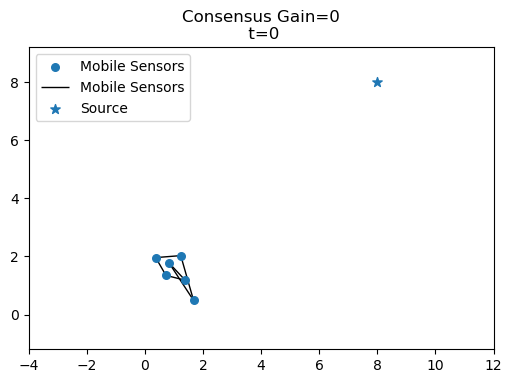

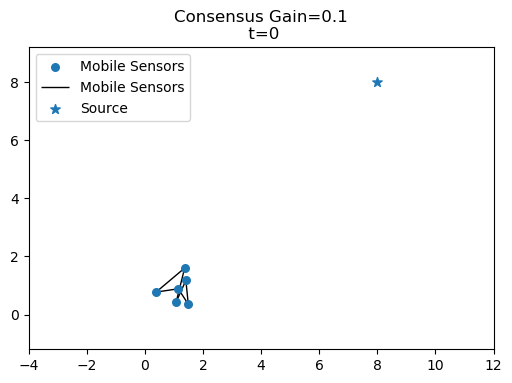

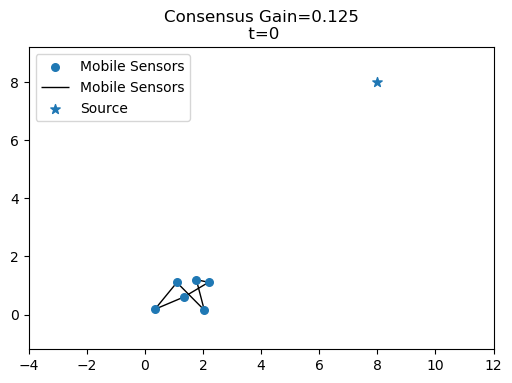

In [10]:

for gain in  [0,0.1,1/8]:
    expr= "Consensus-gain{}-FIM-Mixture".format(gain)
    filepath = "{}.pkl".format(expr)
    with open(filepath,'rb') as file:
        record = pkl.load(file)
    title=r"Consensus Gain={}".format(gain)
    ps = np.array([locs for sensor, locs in record['sensor_locs'].items()])
    qs = record['src_locs']['source_1']
    N_iter = ps.shape[1]

    fig, ax = plt.subplots(dpi=100)
    def plot_single_frame(j):
        ax.cla()
        G = record['comm_network'][j]
        nx.draw(G,pos=ps[:,j,:],ax=ax,label='Mobile Sensors',node_size=30) # ps.shape=(n_sensors,N_iter,space_dim)
        ax.scatter(qs[j,0],qs[j,1],marker='*',s=50,label='Source')
        ax.axis('on')
        ax.axis('equal')
        ax.tick_params(left=True, bottom=True, labelleft=True, labelbottom=True)
        ax.set_xlim((-4,12))
        ax.set_ylim((-4,12))
        ax.legend()
        ax.set_title(title+"\n t={}".format(j))
        plt.show()


    # call the animator.  blit=True means only re-draw the parts that have changed.
    anim = animation.FuncAnimation(fig, plot_single_frame,
                                   frames=N_iter,interval=100)
    anim.save('{}.mp4'.format(expr))